In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Load the dataset (update the file path if needed)
file_path = 'dataset.csv'  # Make sure to use the correct file path
data = pd.read_csv(file_path)

# Define columns for home appliances and user-related data
home_appliances_columns = ['Rooms', 'Members', 'Fans', 'Lights', 'Freezes', 'Microwave Oven',
                           'Geyser', 'AC', 'Washing Machine', 'TV', 'PC', 'Induction Stove']

# Define columns for prepaid and postpaid consumption data
prepaid_columns = ['pre_22_june_unit', 'pre_22_july_unit', 'pre_22_aug_unit', 'pre_22_sep_unit',
                   'pre_22_oct_unit', 'pre_22_nov_unit', 'pre_22_dec_unit', 'pre_23_jan_unit',
                   'pre_23_feb_unit', 'pre_23_mar_unit', 'pre_23_apr_unit', 'pre_23_may_unit',
                   'pre_23_june_unit', 'pre_23_jul_unit', 'pre_23_aug_unit', 'pre_23_sep_unit',
                   'pre_23_oct_unit', 'pre_23_nov_unit', 'pre_23_dec_unit']

postpaid_columns = ['post_21_july_unit', 'post_21_august_unit', 'post_21_sep_unit', 'post_21_oct_unit',
                    'post_21_nov_unit', 'post_21_dec_unit', 'post_22_jan_unit', 'post_22_feb_unit',
                    'post_22_mar_unit', 'post_22_april_unit', 'post_22_may_unit']

# Clean the data if necessary: convert non-numeric values to NaN and fill missing values
prepaid_data_cleaned = data[home_appliances_columns + prepaid_columns].apply(pd.to_numeric, errors='coerce').fillna(0)
postpaid_data_cleaned = data[home_appliances_columns + postpaid_columns].apply(pd.to_numeric, errors='coerce').fillna(0)

# Pearson correlation for home appliances and prepaid usage
prepaid_correlation = prepaid_data_cleaned.corr(method='pearson')

# Pearson correlation for home appliances and postpaid usage
postpaid_correlation = postpaid_data_cleaned.corr(method='pearson')

# Display both correlation matrices
print("Pearson Correlation between Home Appliances and Prepaid Usage:")
print(prepaid_correlation)

print("\nPearson Correlation between Home Appliances and Postpaid Usage:")
print(postpaid_correlation)

# Optional: Save the correlation matrices to CSV files for easier analysis
prepaid_correlation.to_csv('prepaid_correlation_matrix.csv')
postpaid_correlation.to_csv('postpaid_correlation_matrix.csv')




Pearson Correlation between Home Appliances and Prepaid Usage:
                     Rooms   Members      Fans    Lights   Freezes  \
Rooms             1.000000  0.422379  0.631128  0.590805  0.495966   
Members           0.422379  1.000000  0.379225  0.354885  0.284323   
Fans              0.631128  0.379225  1.000000  0.491054  0.358429   
Lights            0.590805  0.354885  0.491054  1.000000  0.337652   
Freezes           0.495966  0.284323  0.358429  0.337652  1.000000   
Microwave Oven    0.513071  0.202378  0.244728  0.405936  0.414830   
Geyser            0.418675  0.193238  0.275161  0.255240  0.518585   
AC                0.538168  0.258450  0.315871  0.430790  0.569451   
Washing Machine   0.465570  0.215645  0.237969  0.343287  0.415587   
TV                0.370109  0.263638  0.269237  0.260271  0.404523   
PC                0.478371  0.270247  0.289680  0.400638  0.374993   
Induction Stove   0.316746  0.170601  0.244081  0.229345  0.239363   
pre_22_june_unit  0.323566 

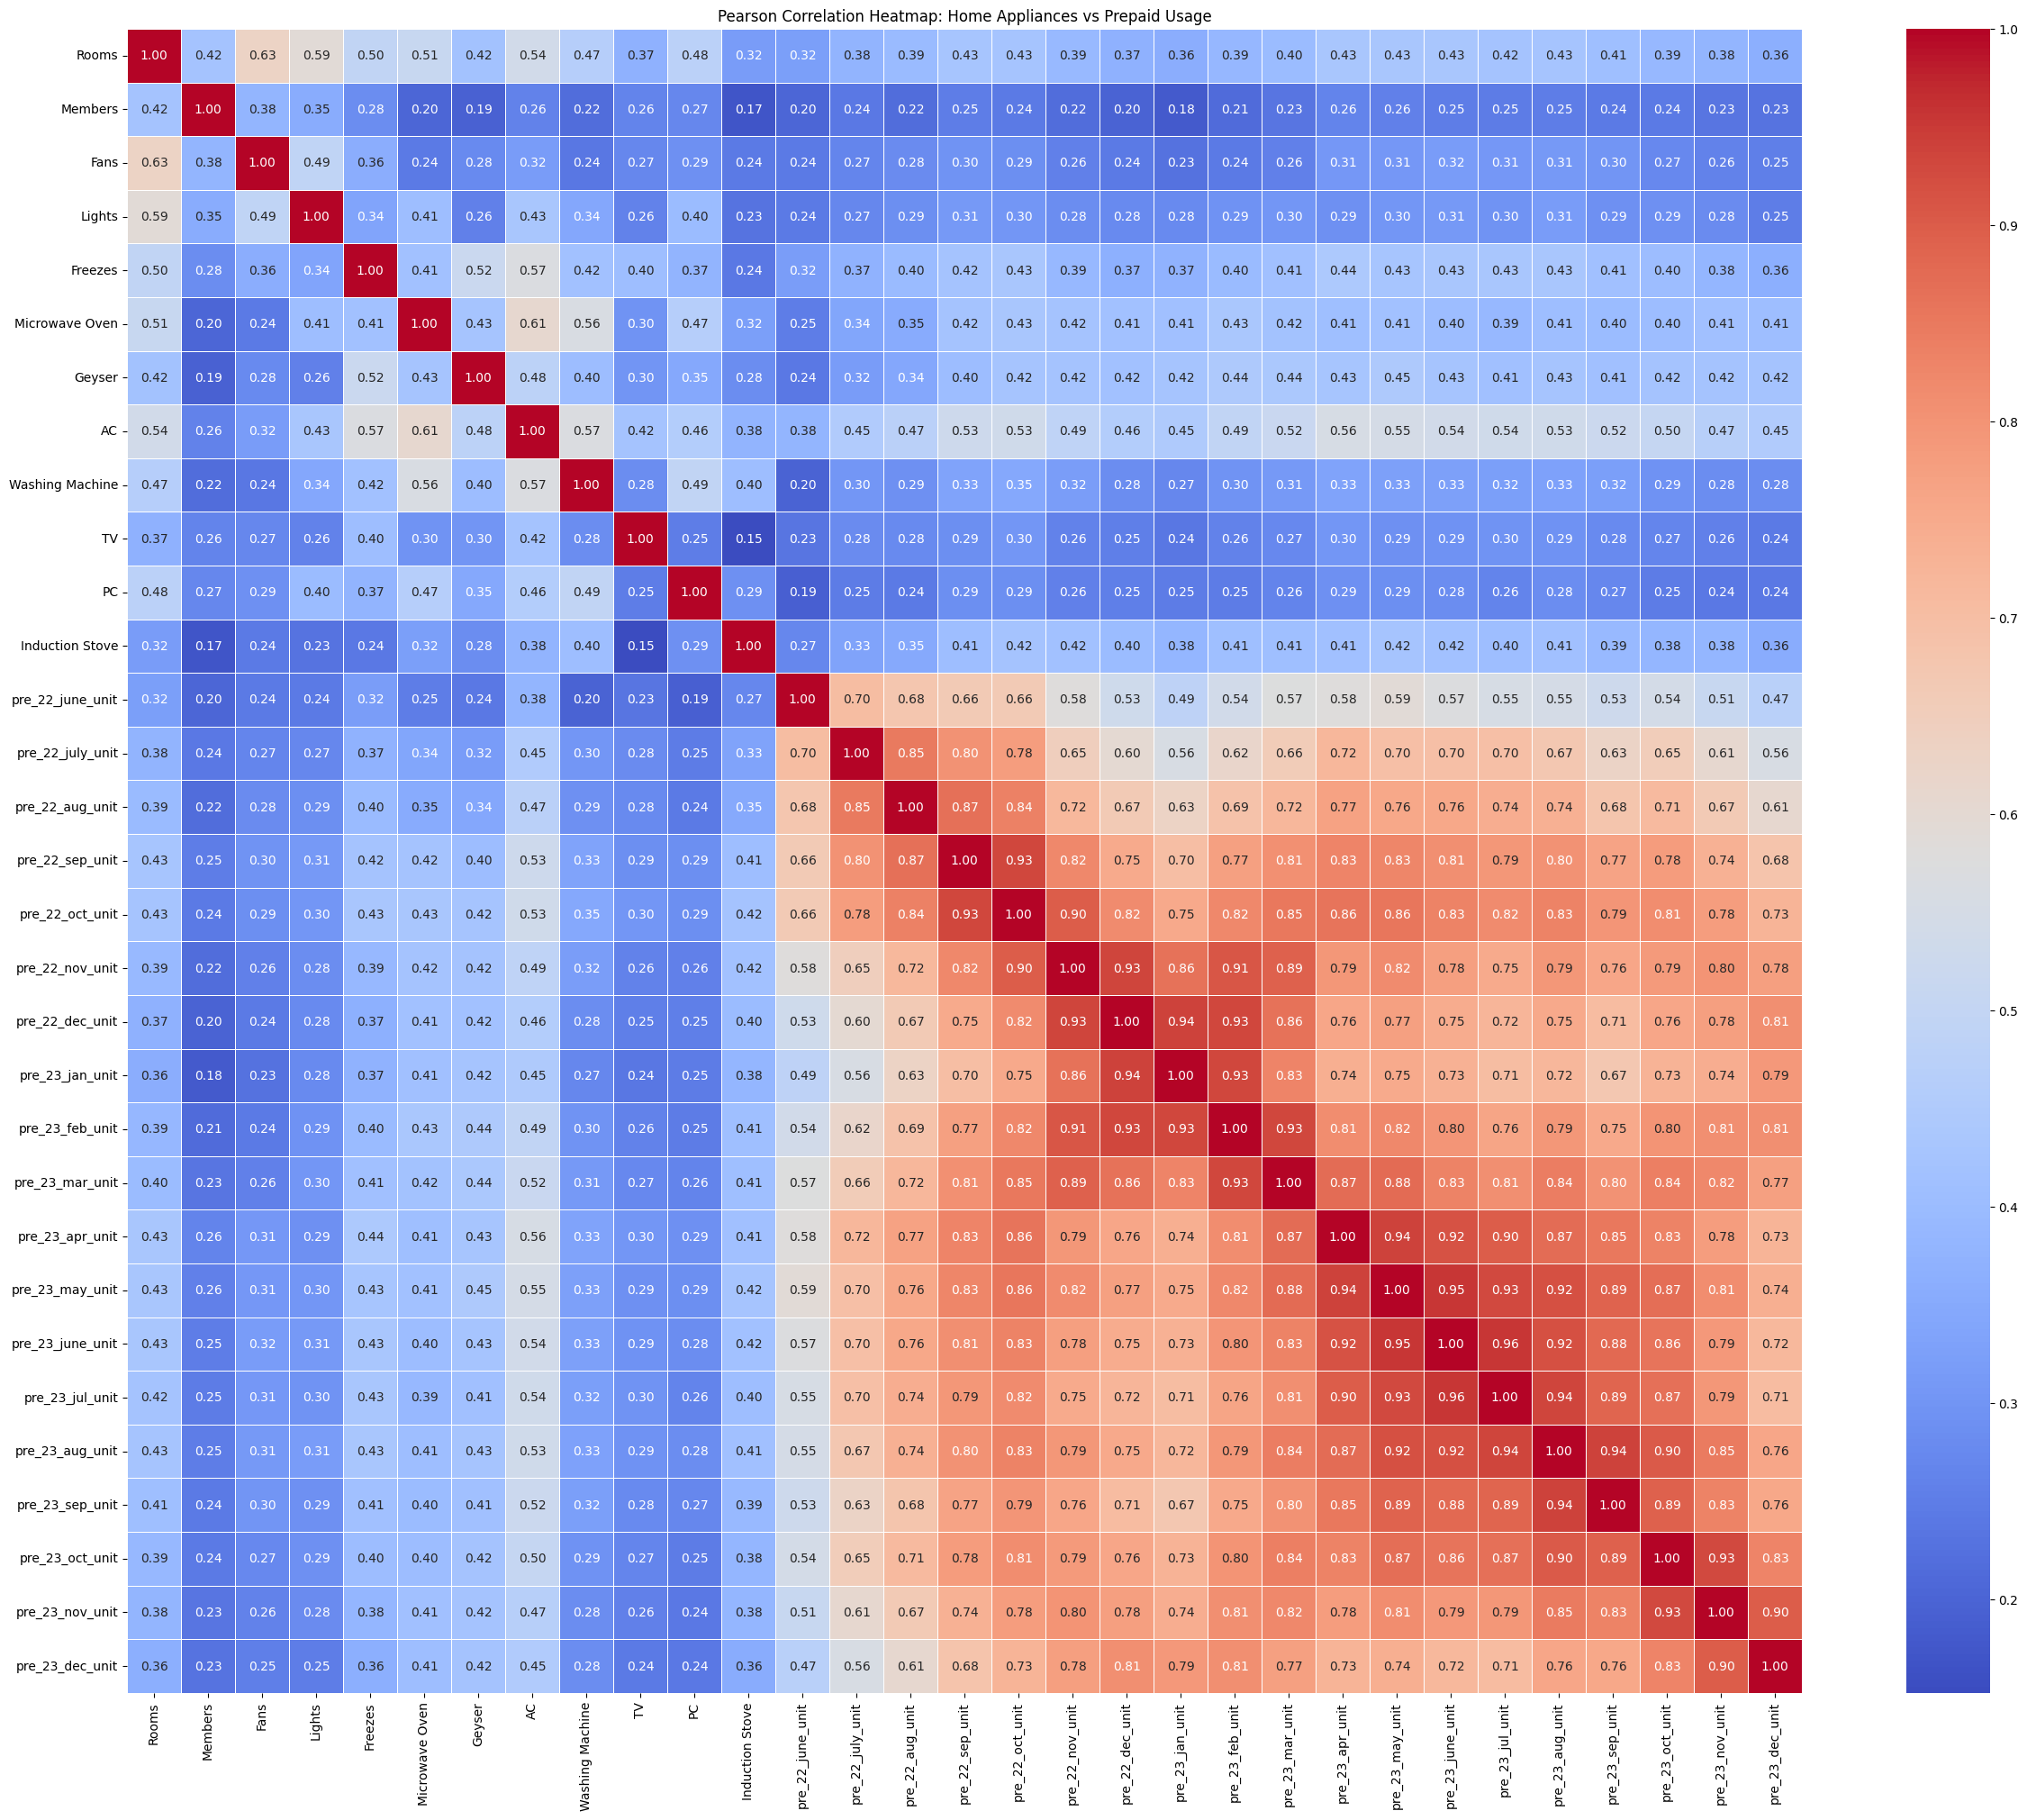

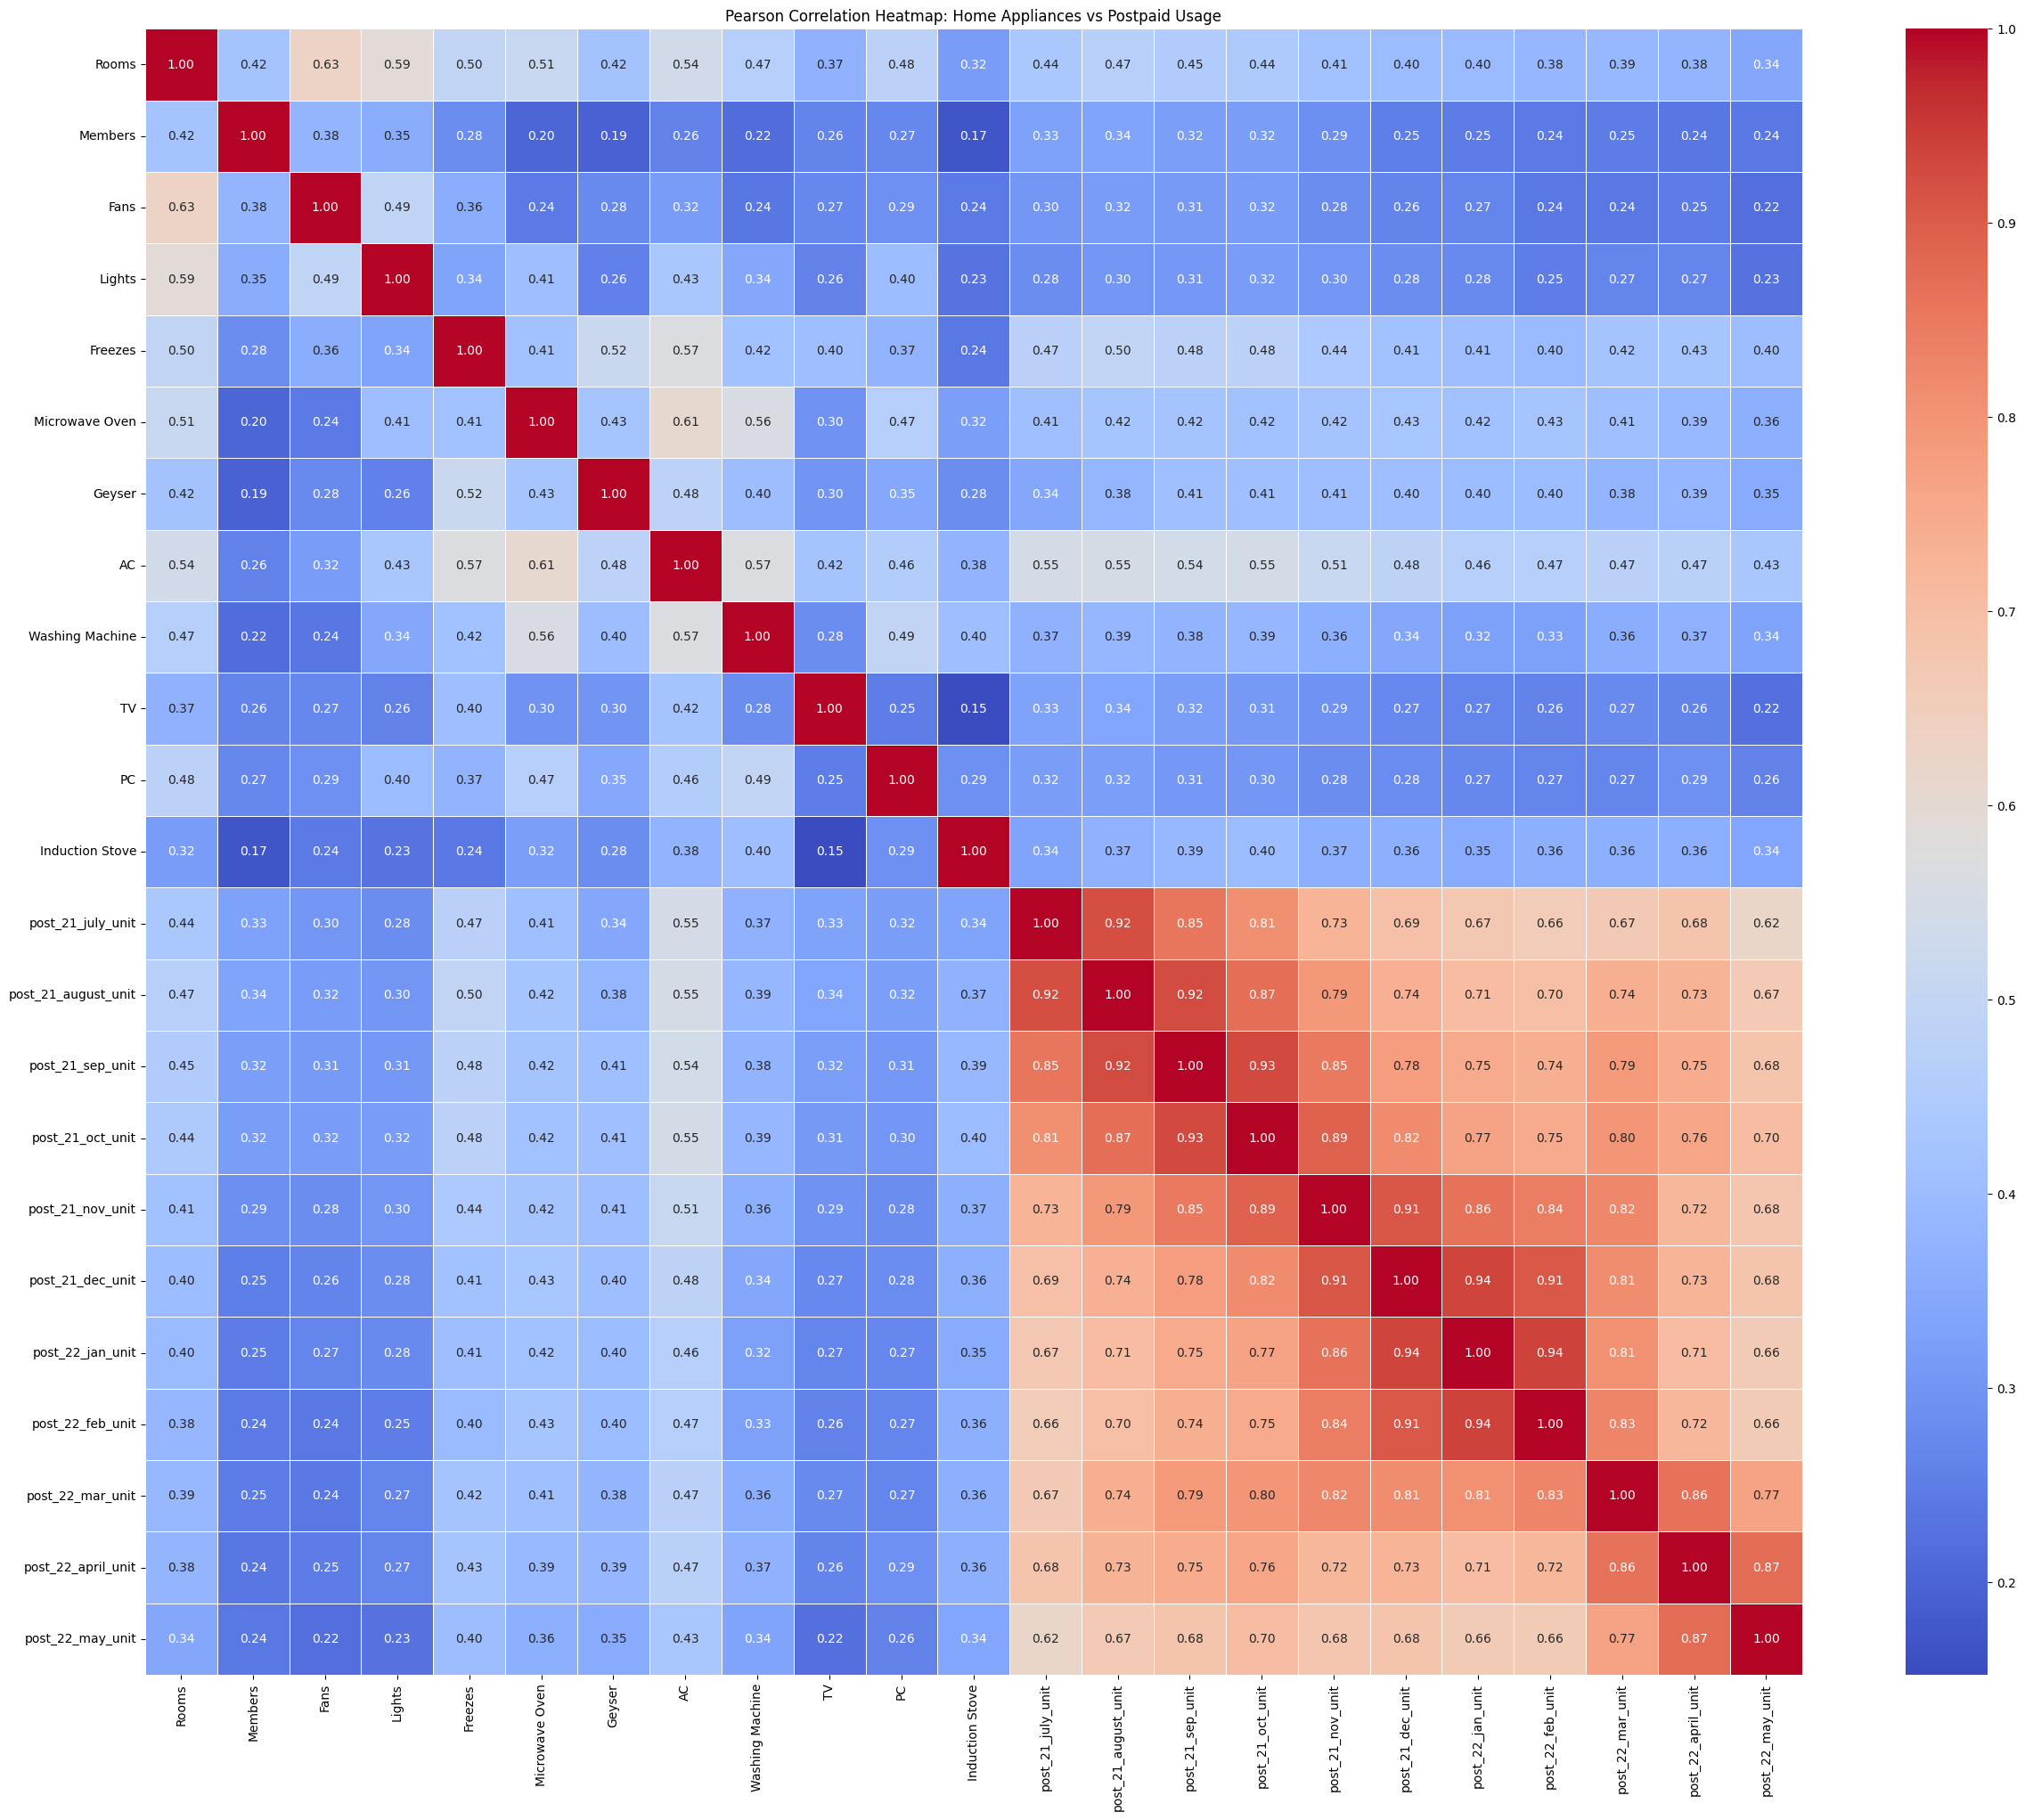

In [35]:
# Visualization: Heatmaps for correlation matrices

# Prepaid
plt.figure(figsize=(30, 24))
heatmap = sns.heatmap(prepaid_correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 10})
plt.title("Pearson Correlation Heatmap: Home Appliances vs Prepaid Usage")
# Save before showing
plt.savefig("Pearson_Correlation_Heatmap_Home_Appliances_vs_Prepaid_Usage.png", bbox_inches='tight', dpi=300)
plt.show()

# Postpaid
plt.figure(figsize=(30, 24))
heatmap = sns.heatmap(postpaid_correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 10})
plt.title("Pearson Correlation Heatmap: Home Appliances vs Postpaid Usage")
# Save before showing
plt.savefig("Pearson_Correlation_Heatmap_Home_Appliances_vs_Postpaid_Usage.png", bbox_inches='tight', dpi=300)
plt.show()



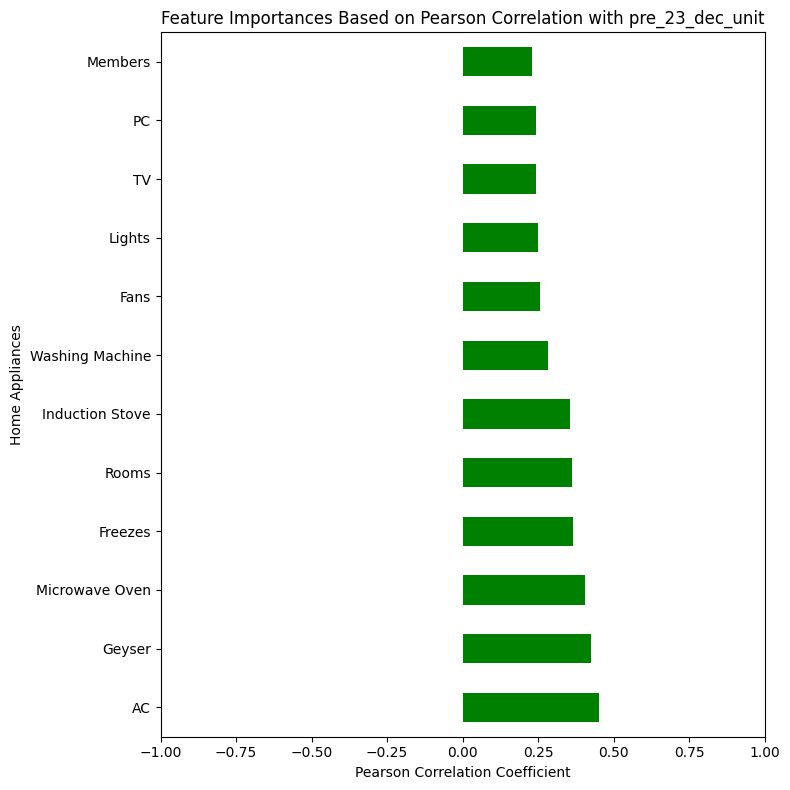

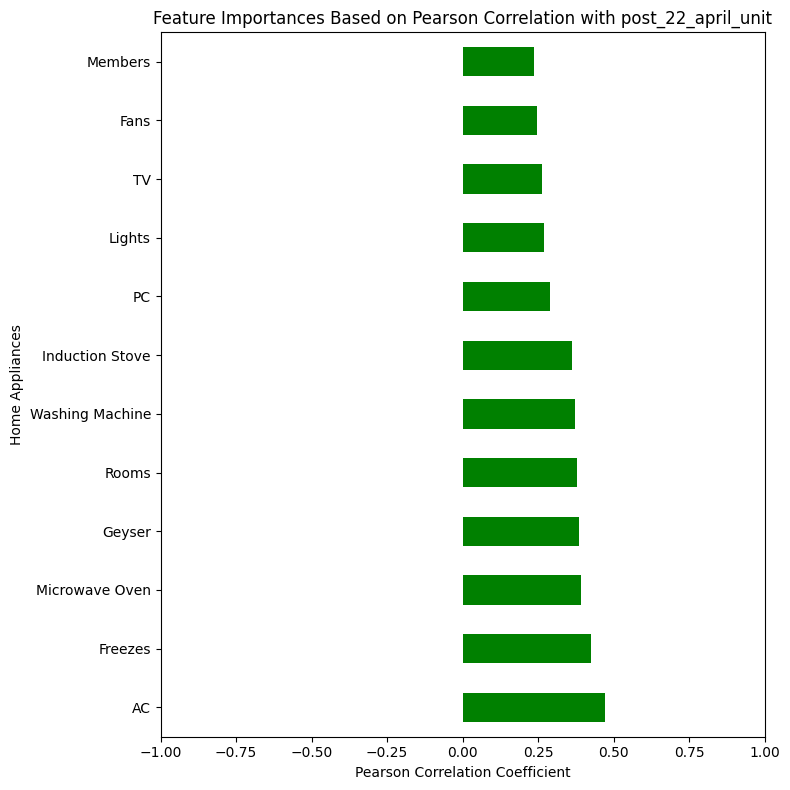

In [36]:
# assume 
pre_target_column = 'pre_23_dec_unit'
post_target_column = 'post_22_april_unit'

# Calculate the correlation of each home appliance feature with the target column
pre_correlations = prepaid_correlation[pre_target_column][home_appliances_columns]
post_correlations = postpaid_correlation[post_target_column][home_appliances_columns]

# Sort the correlations by absolute values in descending order for visibility
pre_sorted_correlations = pre_correlations.abs().sort_values(ascending=False)
post_sorted_correlations = post_correlations.abs().sort_values(ascending=False)

# Plot the bar chart for the filtered appliance correlations

# Prepaid
plt.figure(figsize=(8, 8))
pre_sorted_correlations.plot(kind='barh', color='green')
plt.title(f"Feature Importances Based on Pearson Correlation with {pre_target_column}")
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Home Appliances")
plt.xlim(-1, 1)  # Pearson correlation ranges from -1 to 1
plt.tight_layout()
plt.savefig(f"Prepaid Feature Importances Based on Pearson Correlation with {pre_target_column}.png", bbox_inches='tight', dpi=300)
plt.show()


# Postpaid
plt.figure(figsize=(8, 8))
post_sorted_correlations.plot(kind='barh', color='green')
plt.title(f"Feature Importances Based on Pearson Correlation with {post_target_column}")
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Home Appliances")
plt.xlim(-1, 1)  # Pearson correlation ranges from -1 to 1
plt.tight_layout()
plt.savefig(f"Postpaid_Feature Importances Based on Pearson Correlation with {post_target_column}.png", bbox_inches='tight', dpi=300)
plt.show()



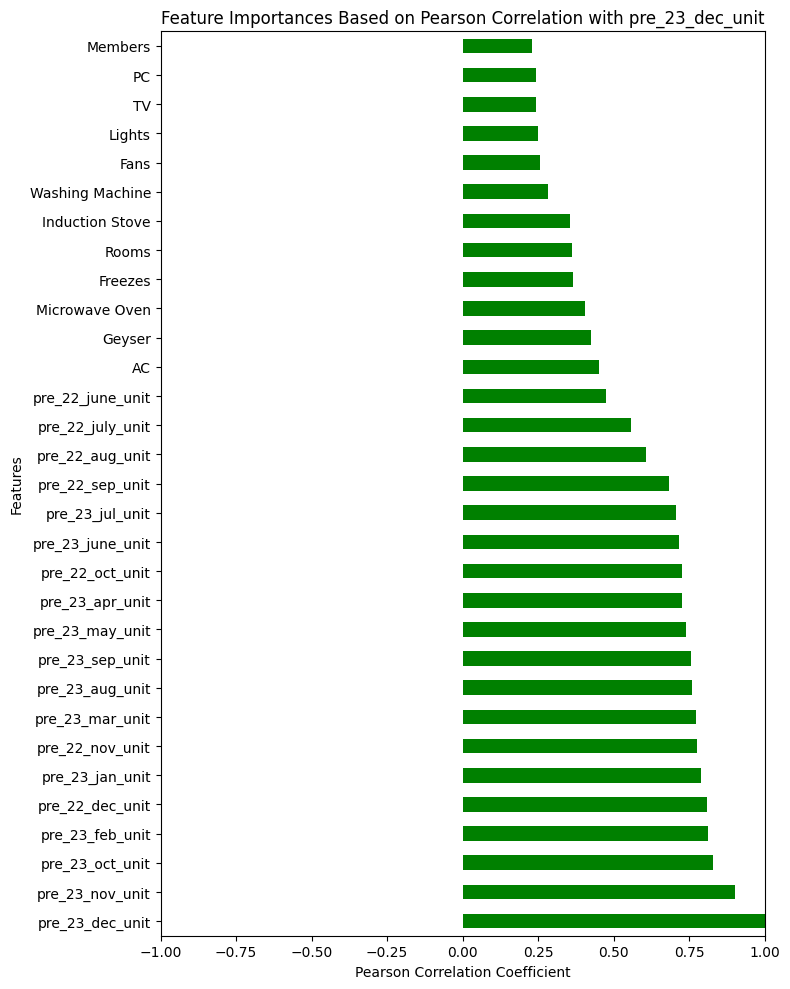

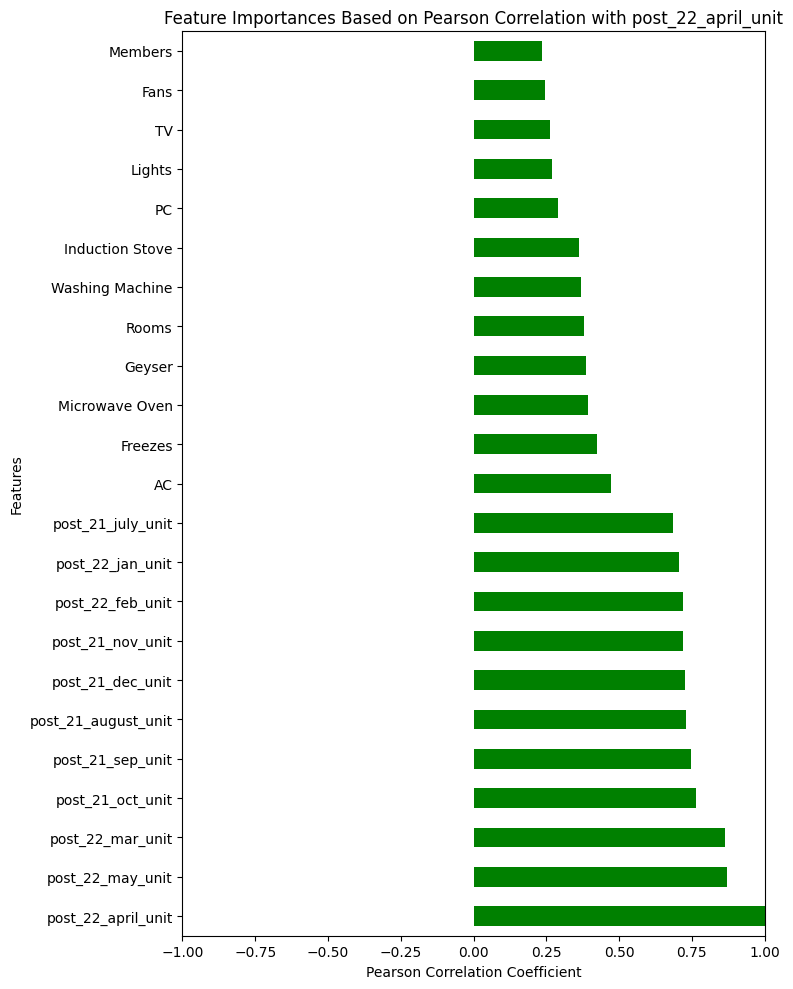

In [37]:
# assume 
pre_target_column = 'pre_23_dec_unit'
post_target_column = 'post_22_april_unit'

pre_correlations = prepaid_correlation[pre_target_column]
post_correlations = postpaid_correlation[post_target_column]

# Sort the correlations by their absolute values in descending order
pre_sorted_correlations = pre_correlations.abs().sort_values(ascending=False)
post_sorted_correlations = post_correlations.abs().sort_values(ascending=False)

# Plot a bar chart of the sorted correlations


# Prepaid
plt.figure(figsize=(8, 10))
pre_sorted_correlations.plot(kind='barh', color='green')
plt.title(f"Feature Importances Based on Pearson Correlation with {pre_target_column}")
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Features")
plt.xlim(-1, 1)  # Pearson correlation ranges from -1 to 1
# Show the plot
plt.tight_layout()
plt.savefig(f"P2_Prepaid_Feature Importances Based on Pearson Correlation with {pre_target_column}.png", bbox_inches='tight', dpi=300)
plt.show()

# Postpaid
plt.figure(figsize=(8, 10))
post_sorted_correlations.plot(kind='barh', color='green')
plt.title(f"Feature Importances Based on Pearson Correlation with {post_target_column}")
plt.xlabel("Pearson Correlation Coefficient")
plt.ylabel("Features")
plt.xlim(-1, 1)  # Pearson correlation ranges from -1 to 1
# Show the plot
plt.tight_layout()
plt.savefig(f"P2_Postpaid_Feature Importances Based on Pearson Correlation with {post_target_column}.png", bbox_inches='tight', dpi=300)
plt.show()


# to perform anomaly detection using Z-scores:

anomaly_threshold = 3

# Calculate Z-scores for prepaid and postpaid usage
prepaid_z_scores = prepaid_data_cleaned[prepaid_columns].apply(zscore)
postpaid_z_scores = postpaid_data_cleaned[postpaid_columns].apply(zscore)

# Detect anomalies based on Z-scores
prepaid_anomalies = prepaid_z_scores[(prepaid_z_scores > anomaly_threshold) | (prepaid_z_scores < -anomaly_threshold)]
postpaid_anomalies = postpaid_z_scores[(postpaid_z_scores > anomaly_threshold) | (postpaid_z_scores < -anomaly_threshold)]

# Display anomalies
print("\nPrepaid Anomalies Detected:")
print(prepaid_anomalies)

print("\nPostpaid Anomalies Detected:")
print(postpaid_anomalies)

# Optional: Save anomaly results to CSV for further analysis
prepaid_anomalies.to_csv('prepaid_anomalies.csv')
postpaid_anomalies.to_csv('postpaid_anomalies.csv')

# Visualization: Bar plot for anomalies count
plt.figure(figsize=(10, 6))
prepaid_anomalies_count = prepaid_anomalies.notnull().sum()
postpaid_anomalies_count = postpaid_anomalies.notnull().sum()

plt.bar(prepaid_anomalies_count.index, prepaid_anomalies_count.values, color='blue', alpha=0.6, label='Prepaid Anomalies')
plt.bar(postpaid_anomalies_count.index, postpaid_anomalies_count.values, color='red', alpha=0.6, label='Postpaid Anomalies')

plt.title('Anomalies Detected in Prepaid and Postpaid Usage')
plt.xlabel('Months')
plt.ylabel('Anomaly Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [38]:
# # Importing the required libraries
# import seaborn as sns
# import pandas as pd
# import matplotlib.pyplot as plt

# # Define the columns you want to include in the scatter plot matrix
# columns = ['Members', 'Fans', 'Lights', 'Freezes', 'Microwave Oven',
#                            'Geyser', 'AC', 'Washing Machine', 'TV', 'PC', 'Induction Stove', 'pre_23_nov_unit']

# # Create a scatter plot matrix using seaborn's pairplot function
# sns.pairplot(data[columns])
# plt.show()


In [39]:
# # Importing necessary libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import stats

# # Convert columns to numeric (to handle any non-numeric values)
# data['Rooms'] = pd.to_numeric(data['Rooms'], errors='coerce')
# data['pre_22_june_unit'] = pd.to_numeric(data['pre_22_june_unit'], errors='coerce')

# # Drop rows with NaN values (if any)
# data_cleaned = data.dropna(subset=['Rooms', 'pre_22_june_unit'])

# # Define the columns for X and Y
# x = data_cleaned['Rooms']
# y = data_cleaned['pre_22_june_unit']

# # Perform linear regression
# slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

# # Create scatter plot with regression line
# plt.figure(figsize=(10, 6))
# plt.scatter(x, y, label='Data points')
# plt.plot(x, intercept + slope * x, color='orange', label=f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r_value:.2f}')
# plt.xlabel('Rooms')
# plt.ylabel('Prepaid Usage in June')
# plt.legend(facecolor='white')
# plt.show()


In [40]:
# data.get('AC', 'Column not found')
# 